In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('/home/rt2122/Data/scans_extended/ep14_thr0.4.csv')

In [5]:
set(df['status'])

{'fn', 'fp', 'tp'}

In [6]:
df = df[df['status'] != 'fn']

In [7]:
df.index = np.arange(len(df))

In [8]:
df.shape

(10451, 11)

In [9]:
tp = df[df['status'] == 'tp']
tp.index = np.arange(len(tp))
fp = df[df['status'] == 'fp']
fp.index = np.arange(len(fp))
tp.shape, fp.shape

((2220, 11), (8231, 11))

In [10]:
list(df)

['RA',
 'DEC',
 'area',
 'min_rad',
 'max_rad',
 'min_pred',
 'max_pred',
 'tRA',
 'tDEC',
 'status',
 'catalog']

In [16]:
params = ['area', 'min_rad', 'max_rad', 'min_pred', 'max_pred']

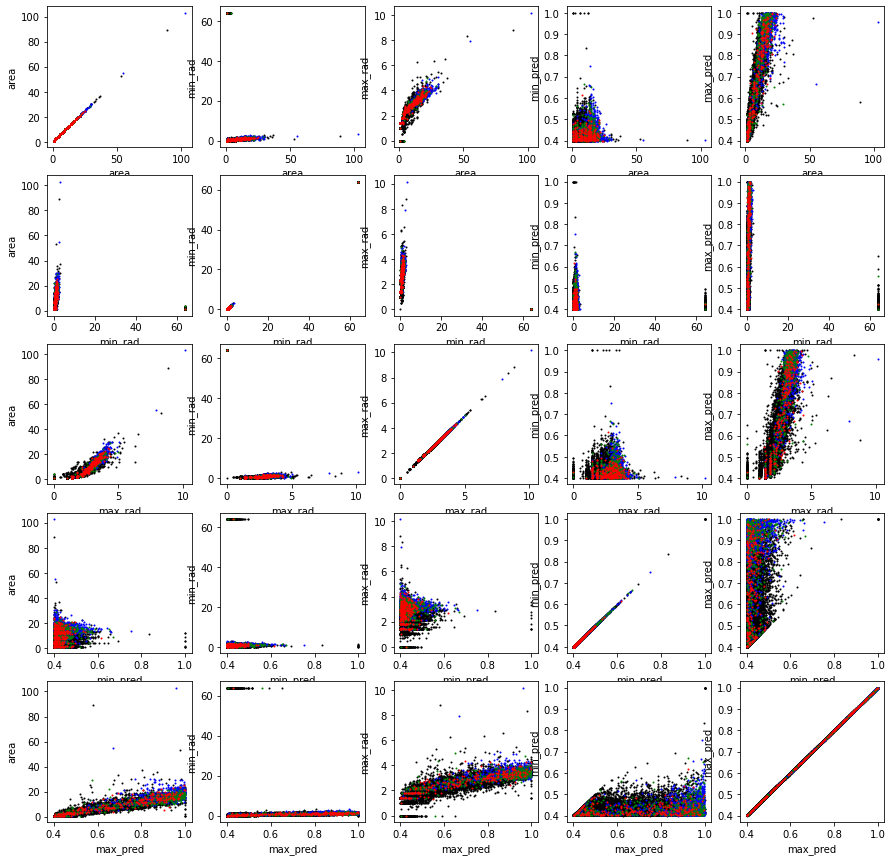

In [27]:
fig, ax = plt.subplots(5, 5, figsize=(15, 15))
for i in range(5):
    for j in range(5):
        ax[i][j].scatter(fp[params[i]], fp[params[j]], c='k', s=1)
        ax[i][j].scatter(tp[tp['catalog'] == 'planck_z'][params[i]], 
                   tp[tp['catalog'] == 'planck_z'][params[j]], c='b', s=1)
        ax[i][j].scatter(tp[tp['catalog'] == 'planck_no_z'][params[i]], 
                   tp[tp['catalog'] == 'planck_no_z'][params[j]], c='g', s=1)
        ax[i][j].scatter(tp[tp['catalog'] == 'mcxcwp'][params[i]], 
                   tp[tp['catalog'] == 'mcxcwp'][params[j]], c='r', s=1)
        ax[i][j].set_xlabel(params[i])
        ax[i][j].set_ylabel(params[j])
plt.show()